In [2]:
from gsmmutils.experimental.exp_matrix import ExpMatrix
from gsmmutils.experimental.biomass import Biomass
from gsmmutils.stats.stats import StatisticalAnalysis
from gsmmutils import DATA_PATH
import pandas as pd
from gsmmutils.graphics.plot import boxplot, hist, qqplot
from pprint import pprint

In [40]:
DATA_PATH = "../data"
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba_new.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)

In [8]:
def boxplot(dataframe, x_cols=None, y_cols=None, to_show=True, path=None, x_labels=None, y_labels=None):
    for y in y_cols:
        fig, axs = plt.subplots(ncols=4)
        fig.tight_layout(pad=3.0)
        index = 0
        for x in x_cols:
            sns.boxplot(data=dataframe, x=x, y=y, ax=axs[index]).set(xlabel=x_labels[x], ylabel=y_labels[y])
            index += 1
    if to_show:
        plt.show()
    else:
        plt.savefig(path, format="pdf", dpi=1200)

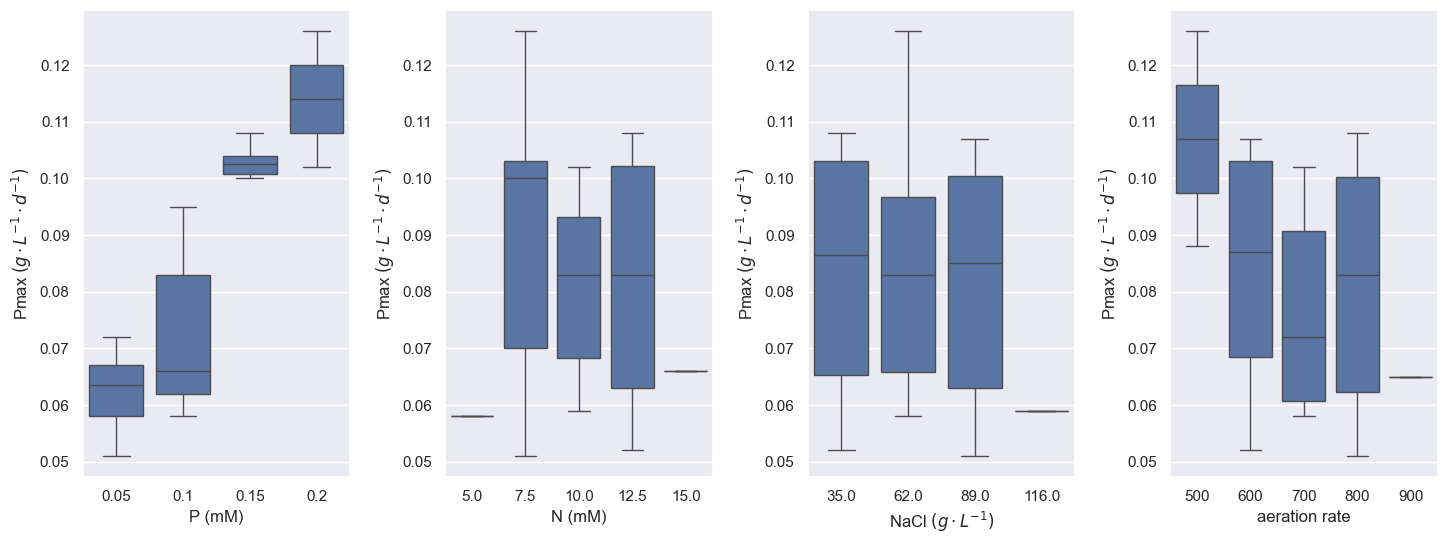

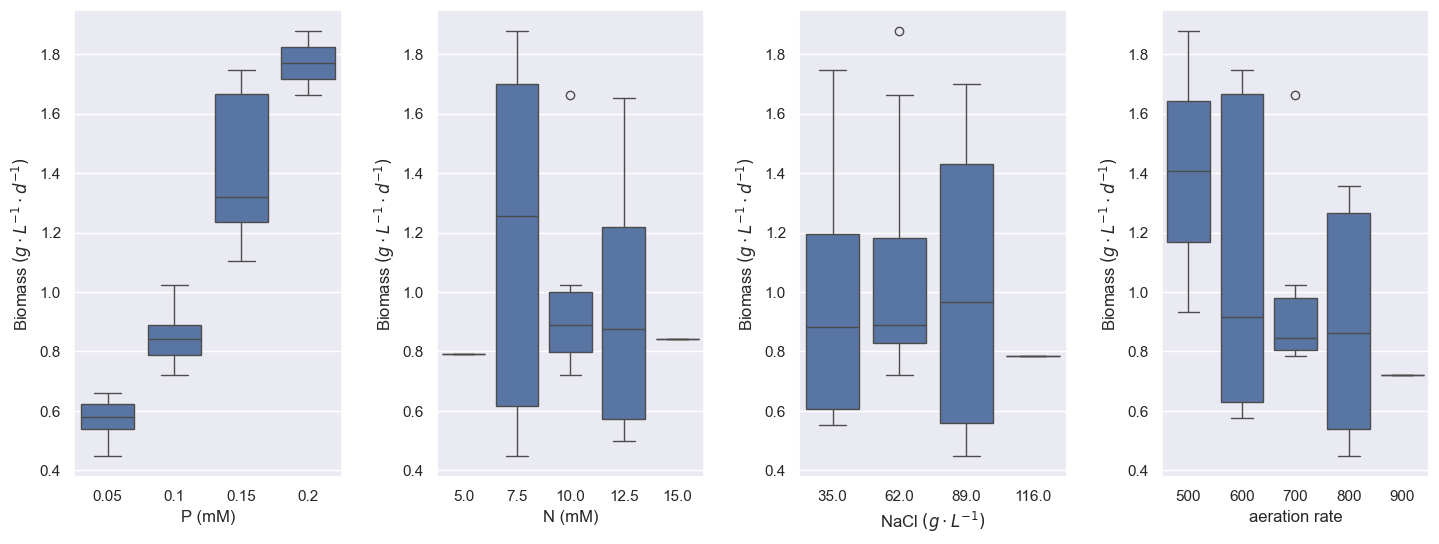

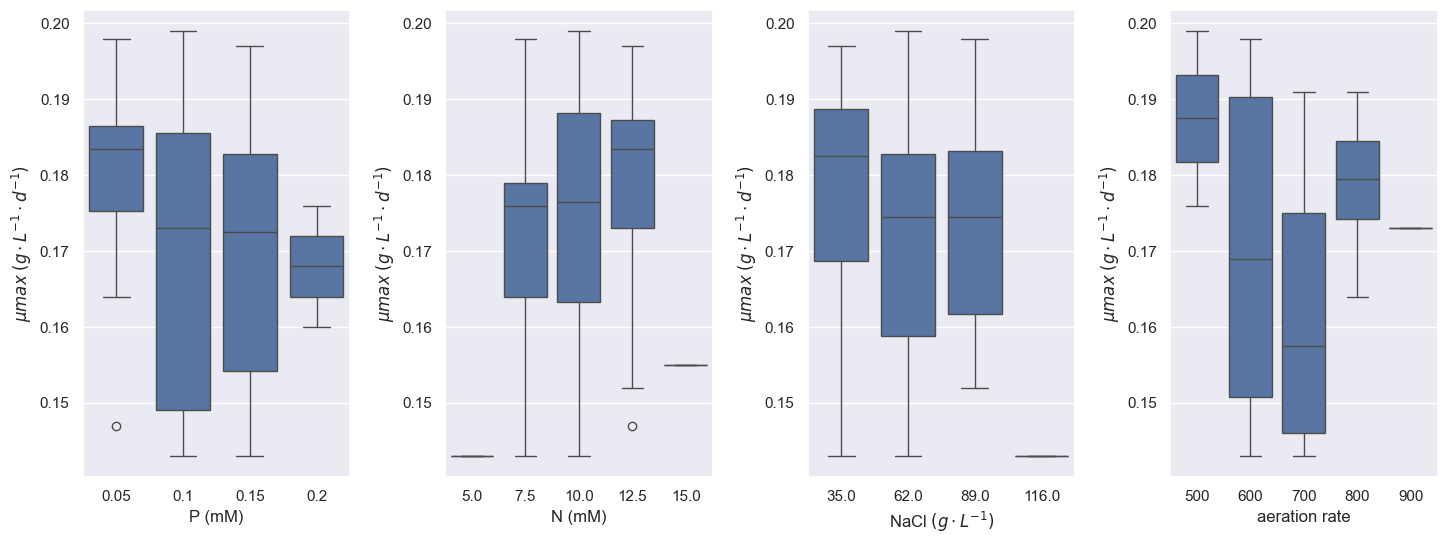

In [44]:
matrix.conditions = matrix.conditions.loc[(~matrix.conditions.index.str.startswith("Xi"))
& (~matrix.conditions.index.str.startswith("Yimei")) & (~matrix.conditions.index.str.startswith("fachet"))]
matrix.conditions = matrix.conditions.loc[~matrix.conditions.index.str.contains("N")]
matrix.conditions = matrix.conditions.dropna()
boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Pmax'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Pmax': 'Pmax $(g \cdot L^{-1} \cdot d^{-1})$'}, path="../results/experimental_analysis/experimental_pmax.pdf")
boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['biomass'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'biomass': 'Biomass $(g \cdot L^{-1} \cdot d^{-1})$'}, path="../results/experimental_analysis/experimental_biomass.pdf")
boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['umax'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'umax': '$\mu max$ $(g \cdot L^{-1} \cdot d^{-1})$'}, path="../results/experimental_analysis/experimental_umax.pdf")

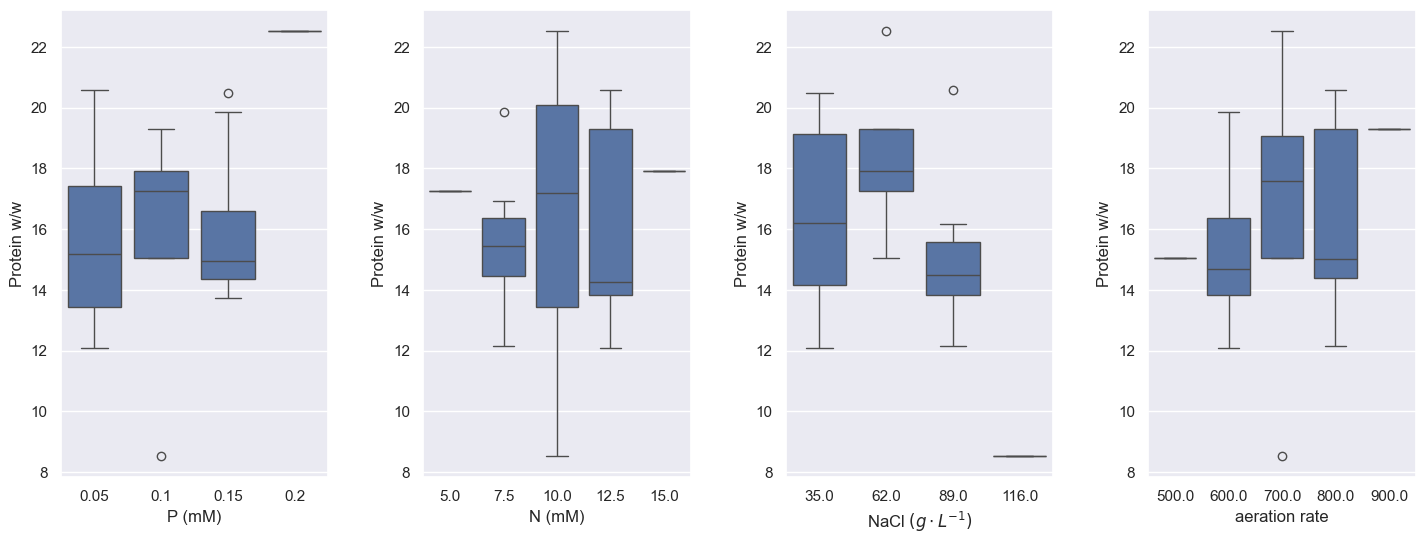

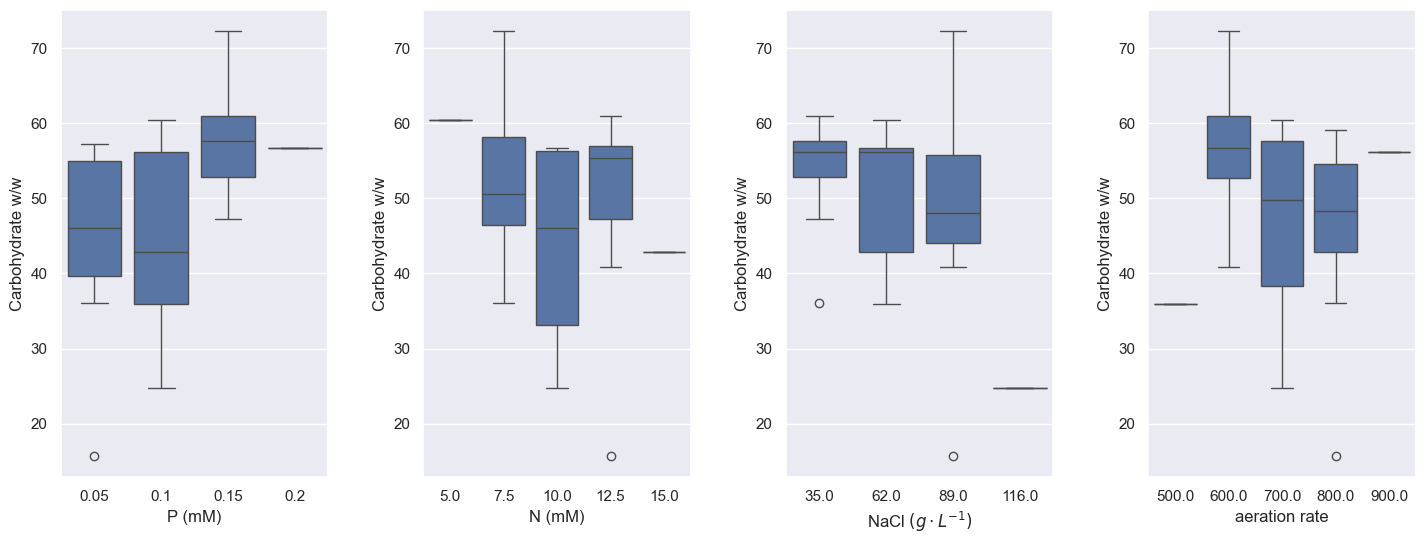

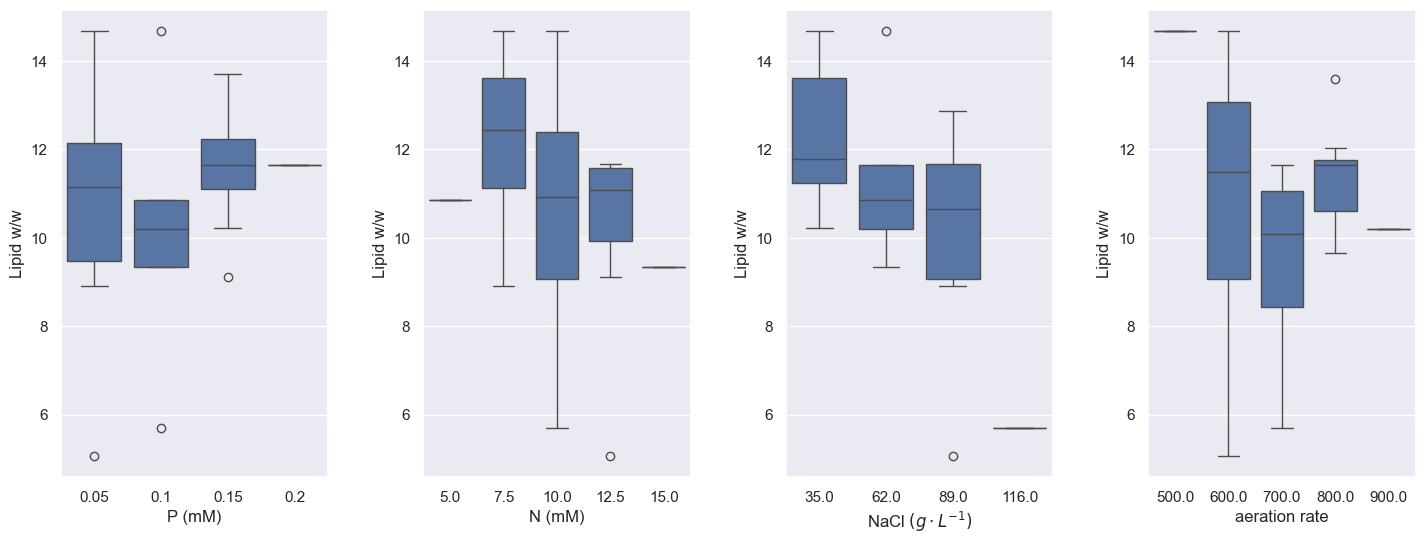

In [4]:
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Protein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Protein': 'Protein w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Carbohydrate'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Carbohydrate': 'Carbohydrate w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Lipid'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Lipid': 'Lipid w/w'})

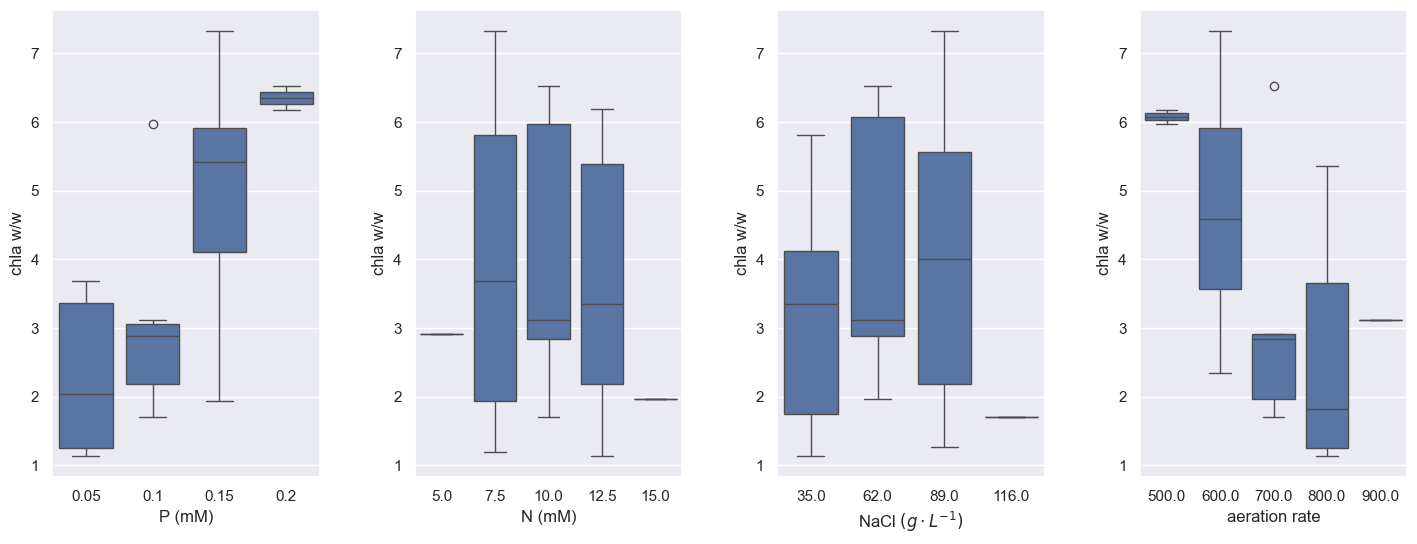

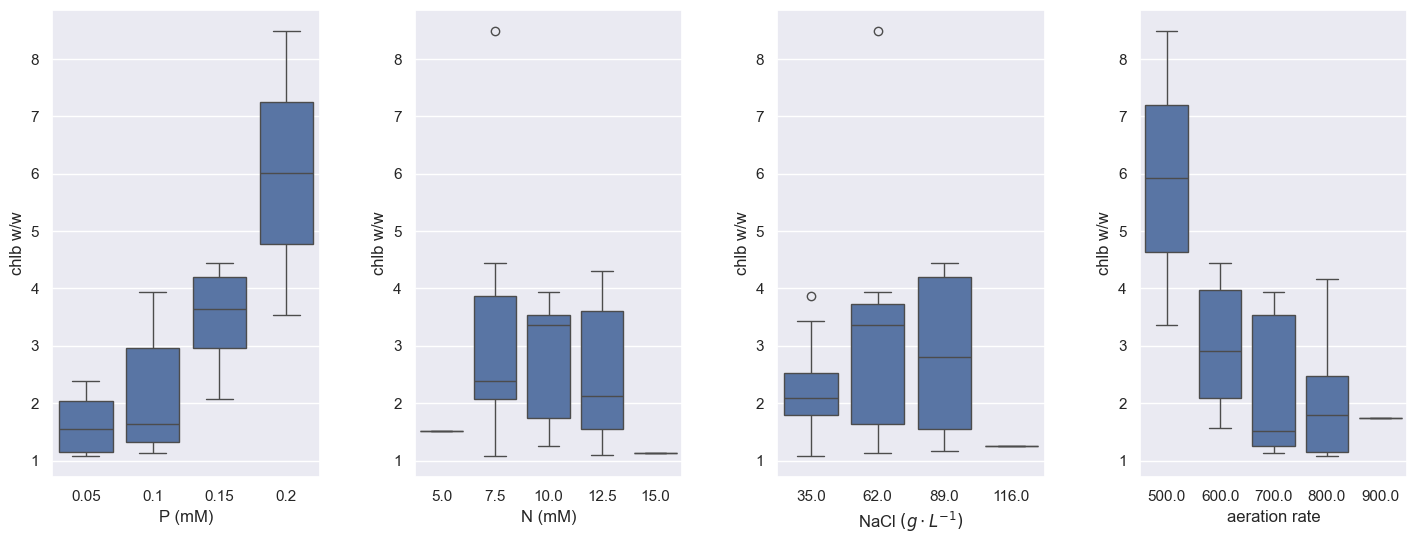

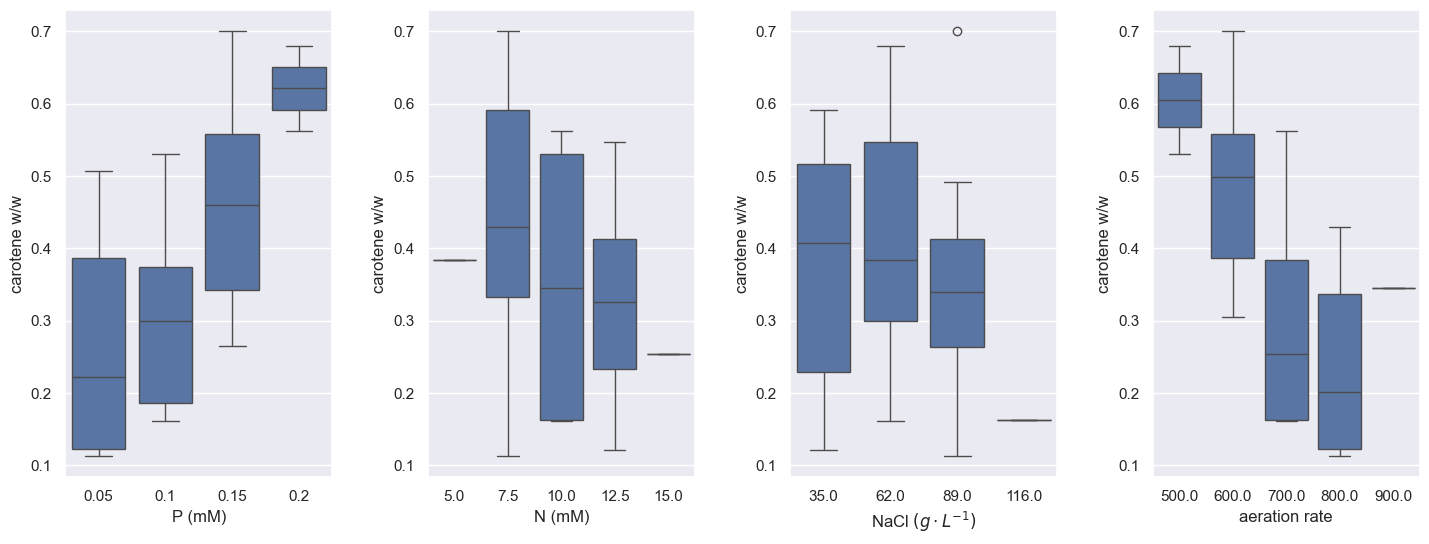

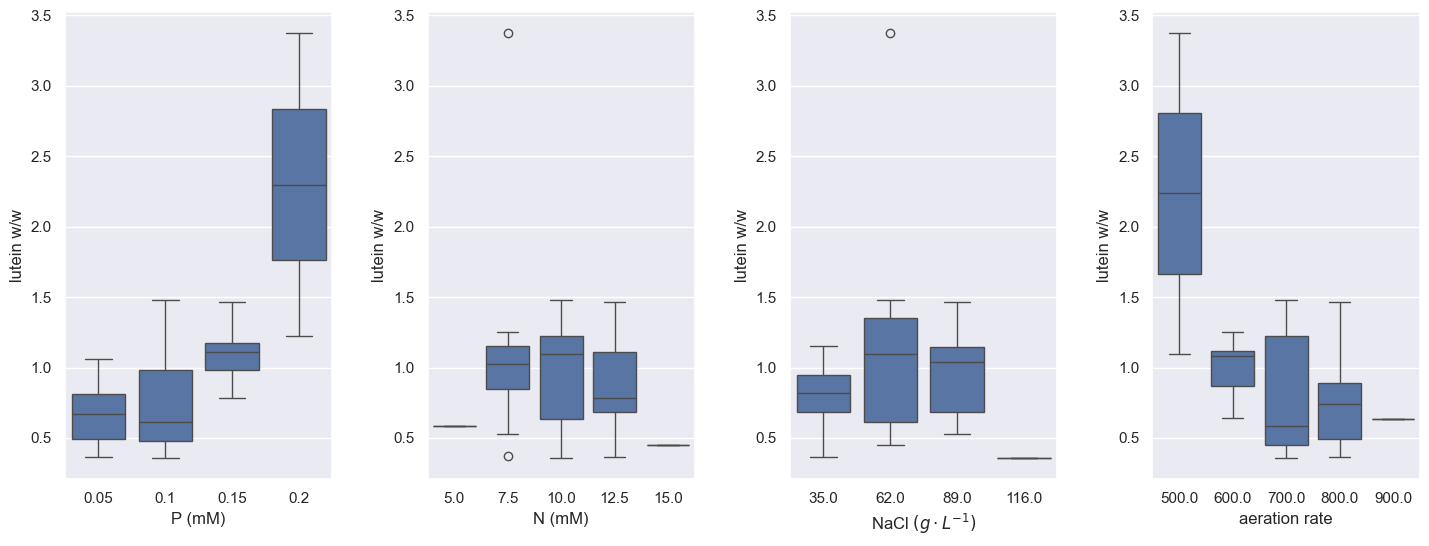

In [10]:
m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.loc[~m.index.str.contains("N")]
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)
# m = m.loc[~m.index.str.startswith("N")]
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chla'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chla': 'chla w/w'}, path="../results/experimental_analysis/experimental_chl.pdf")
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chlb'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chlb': 'chlb w/w'}, path="../results/experimental_analysis/experimental_chlb.pdf")
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'}, path="../results/experimental_analysis/experimental_carotene.pdf")
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['lutein'], to_show=False, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'lutein': 'lutein w/w'}, path="../results/experimental_analysis/experimental_lutein.pdf")

In [68]:
m1 = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m2 = pd.concat([biomass.biomass_matrix['pigments'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m_complete = pd.concat([biomass.biomass_matrix['macromolecules'], biomass.biomass_matrix['pigments'], 
                        matrix.conditions[['biomass', 'Pmax', 'umax', "N", "P", "salinity", "aeration"]]], axis=1)
m_complete = m_complete.loc[~m_complete.index.str.startswith("N")]

,Protein,Carbohydrate,Lipid,Lutein (mean),Lutein (sd),Lutein (cv),Chlorophyll b (mean),Chlorophyll b (sd),Chlorophyll b (cv),Chlorophyll a (mean),...,B-carotene (mean),B-carotene (sd),B-carotene (cv),biomass,Pmax,umax,N,P,salinity,aeration
1,16.932447,57.239583,14.670854,0.892282,0.014099,1.580094,2.106221,0.037487,1.779835,3.663436,...,0.506452,0.006112,1.206888,0.660943,0.072,0.188,7.5,0.05,35.0,600.0
2,12.077098,54.644013,11.560137,0.785577,0.046654,5.938849,2.016852,0.129698,6.430733,3.260304,...,0.386454,0.026351,6.818621,0.580712,0.052,0.147,12.5,0.05,35.0,600.0
3,19.844864,60.939716,13.709165,1.150453,0.038275,3.326978,3.865616,0.150260,3.887102,5.817795,...,0.590828,0.014449,2.445603,1.748822,0.103,0.143,7.5,0.15,35.0,600.0
4,14.029915,56.242138,11.404762,1.110615,0.040572,3.653121,3.433815,0.136486,3.974764,5.475308,...,0.547626,0.014790,2.700746,1.173071,0.103,0.197,12.5,0.15,35.0,600.0
5,16.182011,46.877023,8.910413,1.058453,0.070040,6.617213,2.382628,0.163968,6.881800,3.687955,...,0.386858,0.022664,5.858472,0.577153,0.070,0.198,7.5,0.05,89.0,600.0
6,13.845805,40.920139,5.070278,0.637941,0.013058,2.046887,1.569082,0.043599,2.778625,2.351200,...,0.305583,0.003564,1.166184,0.645167,0.064,0.183,12.5,0.05,89.0,600.0
7,15.377778,72.281553,12.866650,1.251329,0.056198,4.491097,4.439353,0.227489,5.124374,7.325148,...,0.700472,0.041744,5.959480,1.699788,0.107,0.155,7.5,0.15,89.0,600.0
8,13.734628,60.954693,9.113875,1.108868,0.023856,2.151354,4.309365,0.072045,1.671835,6.183318,...,0.491775,0.003209,0.652459,1.654709,0.102,0.152,12.5,0.15,89.0,600.0
9,14.209277,36.089109,13.589299,0.373730,0.008585,2.297208,1.081044,0.047139,4.360553,1.192205,...,0.123815,0.006232,5.033497,0.617091,0.063,0.179,7.5,0.05,35.0,800.0
10,18.913580,56.041667,10.743103,0.361253,0.030591,8.467999,1.098063,0.136184,12.402178,1.138083,...,0.120510,0.002215,1.838178,0.552240,0.066,0.186,12.5,0.05,35.0,800.0


In [87]:
tmp

,Protein,Carbohydrate,Lipid,Lutein_(mean),Lutein_(sd),Lutein_(cv),Chlorophyll_b_(mean),Chlorophyll_b_(sd),Chlorophyll_b_(cv),Chlorophyll_a_(mean),...,B-carotene_(mean),B-carotene_(sd),B-carotene_(cv),biomass,Pmax,umax,N,P,salinity,aeration
1,16.932447,57.239583,14.670854,0.892282,0.014099,1.580094,2.106221,0.037487,1.779835,3.663436,...,0.506452,0.006112,1.206888,0.660943,0.072,0.188,7.5,0.05,35.0,600.0
2,12.077098,54.644013,11.560137,0.785577,0.046654,5.938849,2.016852,0.129698,6.430733,3.260304,...,0.386454,0.026351,6.818621,0.580712,0.052,0.147,12.5,0.05,35.0,600.0
3,19.844864,60.939716,13.709165,1.150453,0.038275,3.326978,3.865616,0.150260,3.887102,5.817795,...,0.590828,0.014449,2.445603,1.748822,0.103,0.143,7.5,0.15,35.0,600.0
4,14.029915,56.242138,11.404762,1.110615,0.040572,3.653121,3.433815,0.136486,3.974764,5.475308,...,0.547626,0.014790,2.700746,1.173071,0.103,0.197,12.5,0.15,35.0,600.0
5,16.182011,46.877023,8.910413,1.058453,0.070040,6.617213,2.382628,0.163968,6.881800,3.687955,...,0.386858,0.022664,5.858472,0.577153,0.070,0.198,7.5,0.05,89.0,600.0
6,13.845805,40.920139,5.070278,0.637941,0.013058,2.046887,1.569082,0.043599,2.778625,2.351200,...,0.305583,0.003564,1.166184,0.645167,0.064,0.183,12.5,0.05,89.0,600.0
7,15.377778,72.281553,12.866650,1.251329,0.056198,4.491097,4.439353,0.227489,5.124374,7.325148,...,0.700472,0.041744,5.959480,1.699788,0.107,0.155,7.5,0.15,89.0,600.0
8,13.734628,60.954693,9.113875,1.108868,0.023856,2.151354,4.309365,0.072045,1.671835,6.183318,...,0.491775,0.003209,0.652459,1.654709,0.102,0.152,12.5,0.15,89.0,600.0
9,14.209277,36.089109,13.589299,0.373730,0.008585,2.297208,1.081044,0.047139,4.360553,1.192205,...,0.123815,0.006232,5.033497,0.617091,0.063,0.179,7.5,0.05,35.0,800.0
10,18.913580,56.041667,10.743103,0.361253,0.030591,8.467999,1.098063,0.136184,12.402178,1.138083,...,0.120510,0.002215,1.838178,0.552240,0.066,0.186,12.5,0.05,35.0,800.0


In [89]:
tmp

,Protein,Carbohydrate,Lipid,Lutein_(mean),Lutein_(sd),Lutein_(cv),Chlorophyll_b_(mean),Chlorophyll_b_(sd),Chlorophyll_b_(cv),Chlorophyll_a_(mean),...,B-carotene_(mean),B-carotene_(sd),B-carotene_(cv),biomass,Pmax,umax,N,P,salinity,aeration
1,16.932447,57.239583,14.670854,0.892282,0.014099,1.580094,2.106221,0.037487,1.779835,3.663436,...,0.506452,0.006112,1.206888,0.660943,0.072,0.188,7.5,0.05,35.0,600.0
2,12.077098,54.644013,11.560137,0.785577,0.046654,5.938849,2.016852,0.129698,6.430733,3.260304,...,0.386454,0.026351,6.818621,0.580712,0.052,0.147,12.5,0.05,35.0,600.0
3,19.844864,60.939716,13.709165,1.150453,0.038275,3.326978,3.865616,0.150260,3.887102,5.817795,...,0.590828,0.014449,2.445603,1.748822,0.103,0.143,7.5,0.15,35.0,600.0
4,14.029915,56.242138,11.404762,1.110615,0.040572,3.653121,3.433815,0.136486,3.974764,5.475308,...,0.547626,0.014790,2.700746,1.173071,0.103,0.197,12.5,0.15,35.0,600.0
5,16.182011,46.877023,8.910413,1.058453,0.070040,6.617213,2.382628,0.163968,6.881800,3.687955,...,0.386858,0.022664,5.858472,0.577153,0.070,0.198,7.5,0.05,89.0,600.0
6,13.845805,40.920139,5.070278,0.637941,0.013058,2.046887,1.569082,0.043599,2.778625,2.351200,...,0.305583,0.003564,1.166184,0.645167,0.064,0.183,12.5,0.05,89.0,600.0
7,15.377778,72.281553,12.866650,1.251329,0.056198,4.491097,4.439353,0.227489,5.124374,7.325148,...,0.700472,0.041744,5.959480,1.699788,0.107,0.155,7.5,0.15,89.0,600.0
8,13.734628,60.954693,9.113875,1.108868,0.023856,2.151354,4.309365,0.072045,1.671835,6.183318,...,0.491775,0.003209,0.652459,1.654709,0.102,0.152,12.5,0.15,89.0,600.0
9,14.209277,36.089109,13.589299,0.373730,0.008585,2.297208,1.081044,0.047139,4.360553,1.192205,...,0.123815,0.006232,5.033497,0.617091,0.063,0.179,7.5,0.05,35.0,800.0
10,18.913580,56.041667,10.743103,0.361253,0.030591,8.467999,1.098063,0.136184,12.402178,1.138083,...,0.120510,0.002215,1.838178,0.552240,0.066,0.186,12.5,0.05,35.0,800.0


In [93]:

tmp = m_complete
conditions = ['N', 'P', 'salinity', 'aeration']        # Condition columns
results = ['Pmax', 'biomass', 'umax', 'Protein', 'Carbohydrate', 'Lipid', 'Chlorophyll a (mean)', 'Chlorophyll b (mean)',
          'B-carotene (mean)', 'Lutein (mean)']  # Result columns

for col in tmp.columns:
    tmp.rename(columns={col: col.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")}, inplace=True)
    
stats = StatisticalAnalysis(tmp)
for result in results:
    for condition in conditions:
        anova_table, model = stats.anova(f'{result.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")} ~ {condition.replace(" ", "_")}')

                    Pmax ~ N                   
             sum_sq    df         F    PR(>F)
N         0.000063   1.0  0.128559  0.723201
Residual  0.011263  23.0       NaN       NaN 
 ##################################################
                    Pmax ~ P                   
             sum_sq    df          F        PR(>F)
P         0.008768   1.0  78.827072  6.862045e-09
Residual  0.002558  23.0        NaN           NaN 
 ##################################################
                Pmax ~ salinity                
             sum_sq    df         F    PR(>F)
salinity  0.000186   1.0  0.383678  0.541729
Residual  0.011140  23.0       NaN       NaN 
 ##################################################
                Pmax ~ aeration                
             sum_sq    df         F    PR(>F)
aeration  0.000889   1.0  1.958037  0.175066
Residual  0.010437  23.0       NaN       NaN 
 ##################################################
                  biomass ~ N        

In [75]:
stats = StatisticalAnalysis(matrix.conditions)
anova_table, model = stats.anova('biomass ~ N')
anova_table, model = stats.anova('Pmax ~ N')
anova_table, model = stats.anova('umax ~ N')

                  biomass ~ N                  
             sum_sq    df         F    PR(>F)
N         0.089608   1.0  0.444987  0.511363
Residual  4.631555  23.0       NaN       NaN 
 ##################################################
                    Pmax ~ N                   
             sum_sq    df         F    PR(>F)
N         0.000063   1.0  0.128559  0.723201
Residual  0.011263  23.0       NaN       NaN 
 ##################################################
                    umax ~ N                   
             sum_sq    df         F    PR(>F)
N         0.000188   1.0  0.552001  0.465023
Residual  0.007828  23.0       NaN       NaN 
 ##################################################


In [76]:
stats = StatisticalAnalysis(matrix.conditions)
anova_table, model = stats.anova('biomass ~ P')
anova_table, model = stats.anova('Pmax ~ P')
anova_table, model = stats.anova('umax ~ P')
# hist(matrix.conditions, ['biomass'], title='Biomass', xlabel='Biomass $(g \cdot L^{-1})$', ylabel='Frequency')
# hist(matrix.conditions, ['Pmax'], title='Maximum Productivity', xlabel='Pmax $(g \cdot L^{-1} \cdot h^{-1})$', ylabel='Frequency')
# hist(matrix.conditions, ['umax'], title='Growth Rate', xlabel='Biomass $(h^{-1})$', ylabel='Frequency')
# qqplot(model, to_show=True)

                  biomass ~ P                  
             sum_sq    df           F        PR(>F)
P         4.051240   1.0  139.088262  3.122369e-11
Residual  0.669924  23.0         NaN           NaN 
 ##################################################
                    Pmax ~ P                   
             sum_sq    df          F        PR(>F)
P         0.008768   1.0  78.827072  6.862045e-09
Residual  0.002558  23.0        NaN           NaN 
 ##################################################
                    umax ~ P                   
             sum_sq    df         F    PR(>F)
P         0.000301   1.0  0.898801  0.352959
Residual  0.007715  23.0       NaN       NaN 
 ##################################################


In [78]:
stats = StatisticalAnalysis(matrix.conditions)
anova_table, model = stats.anova('biomass ~ salinity')
anova_table, model = stats.anova('Pmax ~ salinity')
anova_table, model = stats.anova('umax ~ salinity')

               biomass ~ salinity              
             sum_sq    df         F    PR(>F)
salinity  0.000008   1.0  0.000037  0.995201
Residual  4.721156  23.0       NaN       NaN 
 ##################################################
                Pmax ~ salinity                
             sum_sq    df         F    PR(>F)
salinity  0.000186   1.0  0.383678  0.541729
Residual  0.011140  23.0       NaN       NaN 
 ##################################################
                umax ~ salinity                
             sum_sq    df         F    PR(>F)
salinity  0.000330   1.0  0.988631  0.330424
Residual  0.007686  23.0       NaN       NaN 
 ##################################################


In [80]:
stats = StatisticalAnalysis(matrix.conditions)
anova_table, model = stats.anova('biomass ~ aeration')
anova_table, model = stats.anova('Pmax ~ aeration')
anova_table, model = stats.anova('umax ~ aeration')

               biomass ~ aeration              
             sum_sq    df        F    PR(>F)
aeration  0.511782   1.0  2.79637  0.108029
Residual  4.209381  23.0      NaN       NaN 
 ##################################################
                Pmax ~ aeration                
             sum_sq    df         F    PR(>F)
aeration  0.000889   1.0  1.958037  0.175066
Residual  0.010437  23.0       NaN       NaN 
 ##################################################
                umax ~ aeration                
             sum_sq    df         F    PR(>F)
aeration  0.000002   1.0  0.004993  0.944276
Residual  0.008015  23.0       NaN       NaN 
 ##################################################


In [72]:
# tmp = matrix.conditions.drop([row for row in matrix.conditions.index.tolist() if row.startswith(r"N")])
tmp = m_complete
conditions = ['N', 'P', 'salinity', 'aeration']        # Condition columns
results = ['Pmax', 'biomass', 'umax', 'Protein', 'Carbohydrate', 'Lipid', 'Chlorophyll a (mean)', 'Chlorophyll b (mean)',
          'B-carotene (mean)', 'Lutein (mean)']  # Result columns

# Correlate only between conditions and results, excluding condition-to-condition correlations
corr_matrix = tmp[conditions + results].corr()

# Filter out the correlations between N and P themselves
filtered_corr = corr_matrix.loc[results, conditions]
print(filtered_corr)

                             N         P  salinity  aeration
Pmax                 -0.074555  0.879845 -0.128094 -0.280095
biomass              -0.137768  0.926338  0.001268 -0.329244
umax                  0.153093 -0.193929 -0.203009  0.014733
Protein               0.063883  0.235845 -0.385421  0.231073
Carbohydrate         -0.211305  0.457332 -0.347278 -0.160456
Lipid                -0.340783  0.164522 -0.558965 -0.093027
Chlorophyll a (mean) -0.099803  0.712574  0.053542 -0.570221
Chlorophyll b (mean) -0.161746  0.716786  0.053450 -0.526115
B-carotene (mean)    -0.264840  0.623429 -0.148374 -0.662476
Lutein (mean)        -0.194859  0.615065  0.019522 -0.492919


In [45]:
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
stats = StatisticalAnalysis(m)
stats.get_correlation().loc[['Protein', "Carbohydrate", "Lipid"], conditions]

,N,P,salinity,aeration
Protein,0.06,0.24,-0.39,0.23
Carbohydrate,-0.21,0.46,-0.35,-0.16
Lipid,-0.34,0.16,-0.56,-0.09


Lipid = -0.05salinity + 14.30
-0.559934492578325


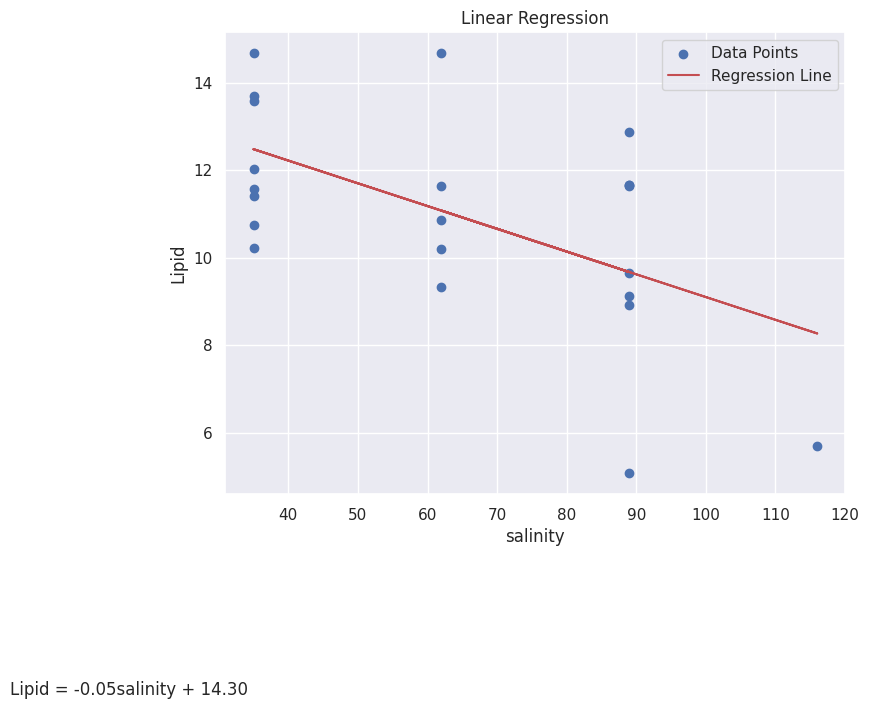

In [47]:
results_dataframe = m
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(results_dataframe['salinity'], results_dataframe['Lipid'])

# Create the regression line equation
equation = f'Lipid = {slope:.2f}salinity + {intercept:.2f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(results_dataframe['salinity'], results_dataframe['Lipid'], label='Data Points')

# Add the regression line to the plot
plt.plot(results_dataframe['salinity'], slope * results_dataframe['salinity'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('salinity')
plt.ylabel('Lipid')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

chlorophyll = 0.032P + 0.003
0.6783950636118288


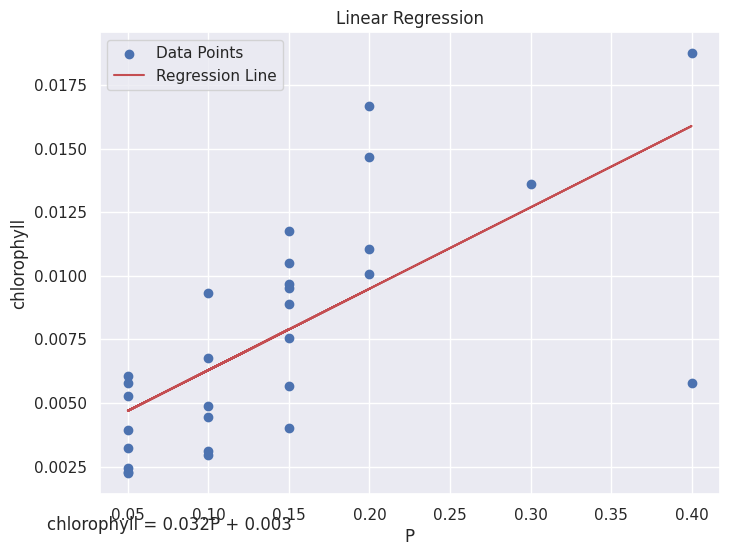

In [48]:
from matplotlib import pyplot as plt
import scipy

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['P'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['P'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('P')
plt.ylabel('chlorophyll')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

In [64]:
def inhibition_function(x, K, a):
    return (K**a) / (K**a + x**a)
inhibition_function(500, 19, 1) 

0.036608863198458574

Fitted K: 587.2871117070362
Fitted a: 2.4903530320960203


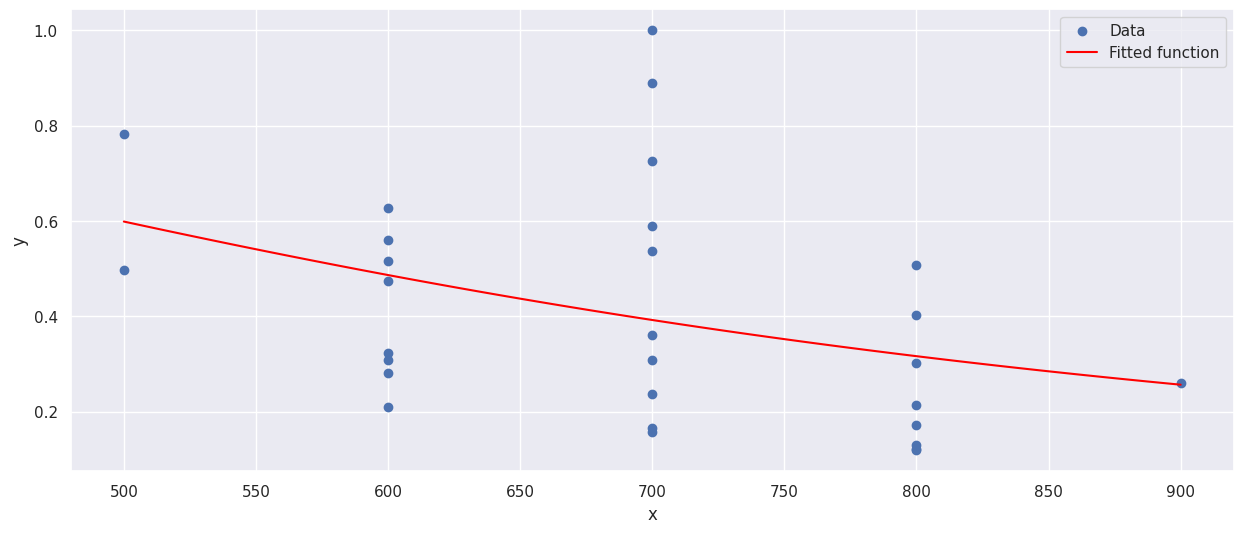

In [68]:
from matplotlib import pyplot as plt
import scipy
from scipy.optimize import curve_fit
import numpy as np
def inhibition_function(x, K, a):
    return (K**a) / (K**a + x**a)

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

temp_results = m.copy()
temp_results['chlorophyll'] = (temp_results['chla'] + temp_results['chlb'])/1000

maximum = temp_results['chlorophyll'].max()

y_data = temp_results['chlorophyll'] /maximum
 
# Perform nonlinear curve fitting
popt, pcov = curve_fit(inhibition_function, temp_results['aeration'], y_data, p0=[500, 10])

# Extract the fitted parameters
K_fitted, a_fitted = popt
print(f"Fitted K: {K_fitted}")
print(f"Fitted a: {a_fitted}")

# Generate points for plotting the fitted curve
x_fit = np.linspace(min(temp_results['aeration']), max(temp_results['aeration']), 100)
y_fit = inhibition_function(x_fit, *popt)

# Plot the data and the fitted curve
plt.scatter(temp_results['aeration'], y_data, label='Data')
plt.plot(x_fit, y_fit, label='Fitted function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



chlorophyll = 2.334P + 0.138
0.7802949272780945


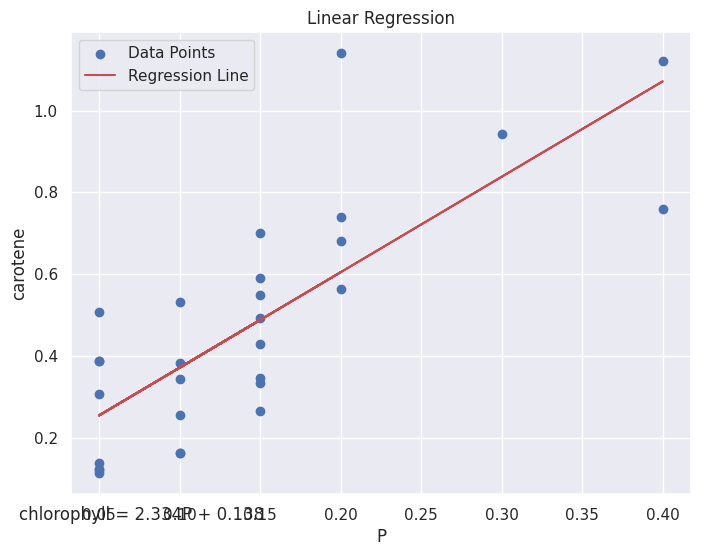

In [49]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(m['P'], m['carotene'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(m['P'], m['carotene'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('P')
plt.ylabel('carotene')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

chlorophyll = 0.276P + 0.389
0.19199073108542164


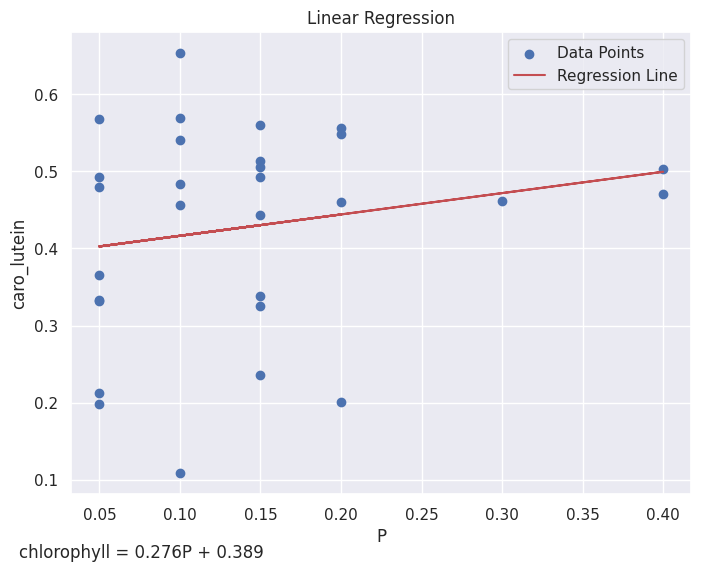

In [51]:
m['caro_lutein'] = m['carotene']/m['lutein']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(m['P'], m['caro_lutein'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(m['P'], m['caro_lutein'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('P')
plt.ylabel('caro_lutein')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

In [13]:
if any(row.startswith("N") for row in m.index.tolist()):
    m = m.drop([row for row in m.index.tolist() if row.startswith(r"N")])
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()
results = ['lutein', "carotene", "chla", "chlb"]
print(cor.loc[results, conditions])

stats.anova('P ~ chla')
stats.anova('N ~ chla')
stats.anova('salinity ~ chla')
stats.anova('aeration ~ chla')

stats.anova('P ~ chlb')
stats.anova('N ~ chlb')
stats.anova('salinity ~ chlb')
stats.anova('aeration ~ chlb')

stats.anova('P ~ carotene')
stats.anova('N ~ carotene')
stats.anova('salinity ~ carotene')
stats.anova('aeration ~ carotene')

stats.anova('P ~ lutein')
stats.anova('N ~ lutein')
stats.anova('salinity ~ lutein')
stats.anova('aeration ~ lutein')

stats.anova('P ~ caro_lutein')
stats.anova('N ~ caro_lutein')
stats.anova('salinity ~ caro_lutein')
stats.anova('aeration ~ caro_lutein')

stats.manova('salinity + aeration ~ carotene')
stats.manova('P + salinity ~ carotene')
stats.manova('N + salinity ~ carotene')
stats.manova('N + P ~ carotene')

             N     P  salinity  aeration
lutein   -0.19  0.61      0.02     -0.49
carotene -0.27  0.63     -0.15     -0.67
chla     -0.10  0.72      0.05     -0.57
chlb     -0.16  0.72      0.05     -0.53
                    P ~ chla                   
             sum_sq    df          F   PR(>F)
chla      0.029999   1.0  23.291835  0.00008
Residual  0.028335  22.0        NaN      NaN 
 ##################################################
                    N ~ chla                   
               sum_sq    df         F    PR(>F)
chla        1.579534   1.0  0.225048  0.639895
Residual  154.410050  22.0       NaN       NaN 
 ##################################################
                salinity ~ chla                
                 sum_sq    df         F    PR(>F)
chla         43.693646   1.0  0.066686  0.798626
Residual  14414.806354  22.0       NaN       NaN 
 ##################################################
                aeration ~ chla                
                  

PatsyError: Error evaluating factor: NameError: name 'caro_lutein' is not defined
    P ~ caro_lutein
        ^^^^^^^^^^^